# Object Detection
- classification과 bounding box를 동시에 예측

- semantic Segmentation : 같은 class의 물체를 같게 인식
- Instance Segmentation, Panoptic Segmentation : 같은 class의 물체라도 다른 물체로 구분해서 인식

## Two-stage Detector

### R-CNN
- 딥러닝 기반의 접근
1. Selective search 등의 huristic한 방법을 통해 region proposal을 구함
2. region들을 CNN classification에 활용할 수 있도록 적절한 사이즈로 warping
3. warped region을 CNN으로 feature를 추출하고, SVM으로 classification하여 결과적으로 region에 대한 classification을 수행

- 단점 
1. eigion proposal 하나하나 마다 classification을 수행해주어야 하기 때문에 속도가 매우 느림
2. end-to-end network가 아니기 때문에 학습을 통한 성능 향상이 제한

@ Selective search
1. 입력 영상에 대해 segmentation을 실시해서 이를 기반으로 후보 영역을 찾기 위한 seed를 설정
2. 초기에 엄청나게 많은 후보들이 만들어짐
3. 이를 적절하게 통합해 egmentation은 후보 영역의 개수를 줄임

### Fast R-CNN 

- R-CNN의 느린속도를 개선하고자 제안
- 이미지 전체에 대한 feature를 한번에 추출하고, 이를 재활용하여 여러 object들을 탐지하는 방식
1. convolution layer를 통해 입력 이미지 전체의 feature map을 추출
2. feature map을 여러번 반복하여 재활용하기 위해 ROI(Region Of Interest) Pooling 기법을 사용
    - 전체 feature map에서 ROI에 해당하는 부분만 추출
3. 이를 고정된 사이즈로 resampling
4. 이를 기반으로 FC layer를 거쳐 region에 대한 classification을 수행
5. 더 정확한 bounding box를 얻기 위해 bounding box regression을 수행


=> 여전히 region proposal을 위해 huristic한 방법을 사용, 성능을 크게 향상시킬 순 없었음

### Faster R-CNN

@ IoU (intersectrion over Union)
- 두 영역의 overlab을 측정하는 기준을 제공
- 두 영역의 합집합 / 교집합 -> 수치가 높을 수록 두 영역이 잘 정합됐다
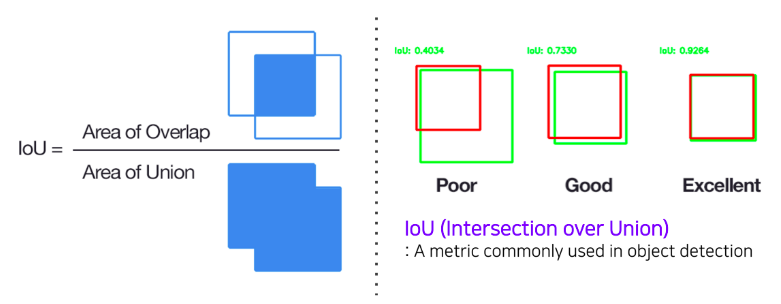

@ region proposal를 anchor box로 접근
- anchor box : 각 픽셀 위치에서 발생할 확률이 높은 bounding box들을 사전에 정의해둔 후보군(미리 임의의 러프한 후보군을 정해놓은것)
- IoU가 0.7을 넘어가면 positive , 0.3보다 작으면 negative를 주어 결정에 도움을 줌

- region proposal을 개선
- selective search 방법이 아닌 Region Proposal Network (RPN) 모듈을 통해 region proposal을 수행
1. 영상에서 feature maps를 출력
2. RPN에서 Region Proposal을 여러개 제안
3. Region Proposal를 이용해 ROI Pooling 실시
4. classification, bounding box를 찾아냄

#### RPN 구조
- Sliding window 방식으로 각 픽셀의 위치마다 k개의 anchor box를 고려
1. 각 픽셀 위치에서 256 차원의 feature 벡터를 추출
2. 이 벡터를 입력으로 classfication layer를 거쳐 object인지 object가 아닌지를 판별하는 2k개의 classification 점수를 출력
3. k개의 bounding box의 정교한 위치를 regression하는 regression layer를 거쳐 4k개의 좌표값을 출력 
    - 4k 인 이유 : bounding box하나를 정의하기 위해서 (왼쪽 위 x,y좌표, 너비, 높이 가 필요)
    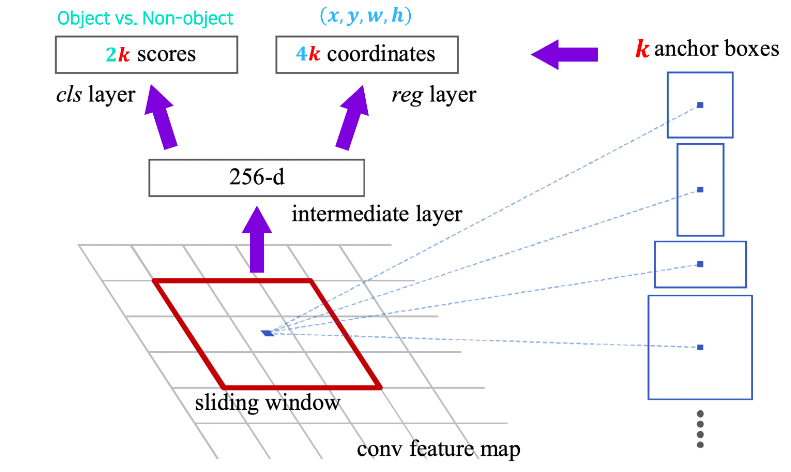

- RPN에서 일정 objectiveness scored이상 나오고, 엄밀한 threshold 값을 정하기도 힘들어서 아주 많은 bounding box가 생성
- 효과적으로 필터링 하기 위해 Non-Maximum Suppersion (NMS)를 사용
- 대부분의 object detection 알고리즘에 활용되었던 기법

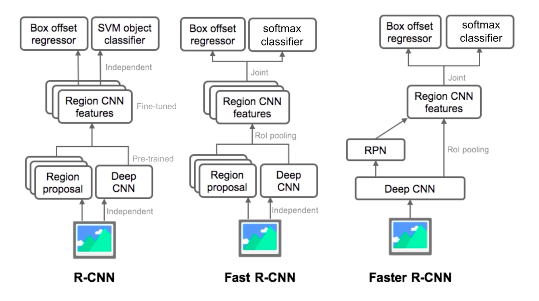

## single-stage(one-stage) detector

- 정확도를 어느정도 포기하더라도 빠르게 object detection을 수행하여 실시간으로 활용할 수 있도록 하는 것에 집중한 구조
- region proposal 과정을 수행하지 않고 bonding box regression과 classification을 수행하기 때문에 빠른 실행시간과 간단한 구조

### YOLO

#### 작동방식
1. 입력 이미지를 SxS의 그리드로 나눔
2. 그리드에 대해서 bounding box의 좌표와 그에 대한 confidence score, 그리고 classification score를 예측
3. NMS를 통해 정리된 bounding box만을 출력

#### 구조 
- 일반 CNN의 구성과 유사
- 최종 출력 : 7x7x30
    - 5(4개의 좌표값 + confidence score)*B(anchor box의 개수, 2) + C(class의 개수, 20)이라 각 위치마다 30 차원의 벡터

### SSD 

- YOLO는 맨 마지막에서 한번만 예측을 수행하기 때문에 localization 성능이 낮은 문제가 존재
- multi-scale object들을 더욱 잘 처리하기 위해 중간 feature들을 각 해상도에 적절한  bounding box를 출력할 수 있도록 동작
- feature map의 크기에 따라 bounding box의 사이즈를 달리함
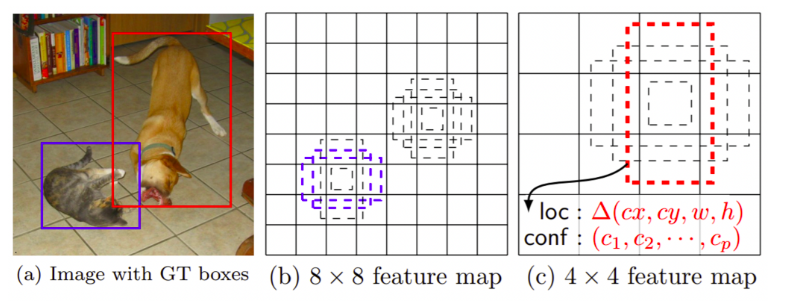

#### 구조 
- VGG를 backborn으로하여 Conv4 블럭의 중간 feature map출력부터 최종결과를 출력하도록 설계
- Conv4 블럭에서부터 bounding box를 출력하여 multi-scale object에 대한 bounding box에 잘 대응하기 위한 구조를 가짐
- 8732의미 : 각 레이어의 anchor box개수의 총 합
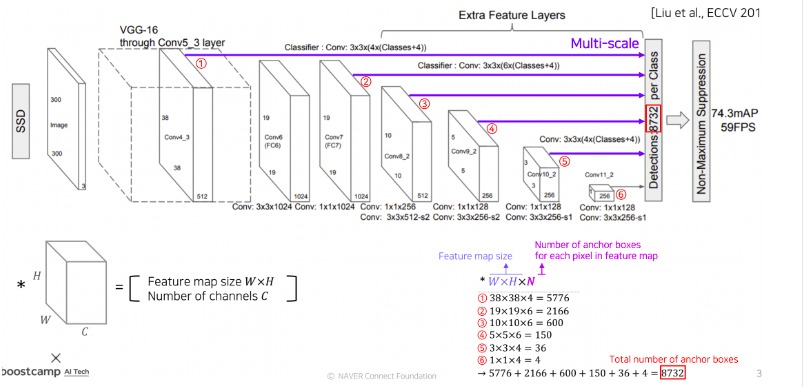
- YOLO보다 높은 성능, 속도 / faster R-CNN보다 높은 성능